In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filenames = [
    'datasets/DatasaurusDozen.tsv'
]

In [3]:
!ls

Datasaurus.ipynb Untitled.ipynb   datasets         images


In [4]:
df = pd.read_csv(filenames[0], delimiter='\t')
df

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
...,...,...,...
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751


In [5]:
datasets = list(df['dataset'].unique())
datasets

['dino',
 'away',
 'h_lines',
 'v_lines',
 'x_shape',
 'star',
 'high_lines',
 'dots',
 'circle',
 'bullseye',
 'slant_up',
 'slant_down',
 'wide_lines']

<AxesSubplot:xlabel='x', ylabel='y'>

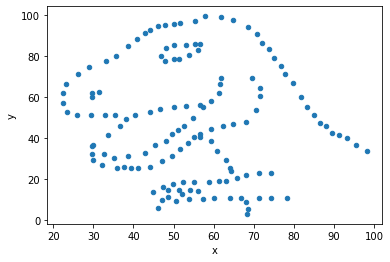

In [6]:
df[df['dataset']=='dino'].plot.scatter('x', 'y')

In [7]:
df[df['dataset']=='dino'].describe().loc[('count','mean','std'),:]

,x,y
count,142.000000,142.000000
mean,54.263273,47.832253
std,16.765142,26.935403


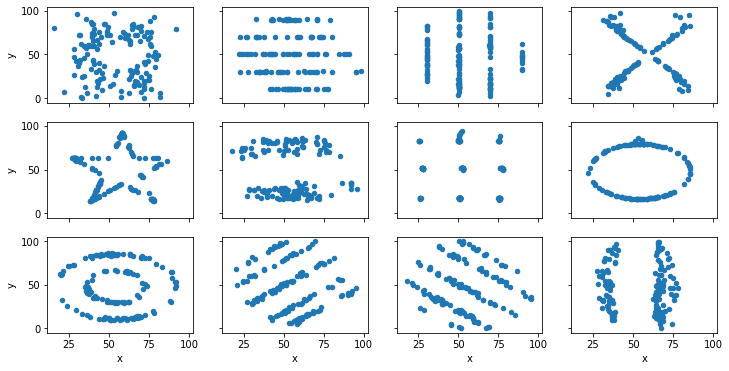

In [8]:
fig, axs = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(12, 6))
for i, dataset in enumerate(datasets[1:]):
    df[df['dataset']==dataset].plot.scatter('x', 'y', ax=axs[i//4, i%4])

In [9]:
describe_list = []
for i, dataset in enumerate(datasets):
    describe_list.append(df[df['dataset']==dataset].describe())

describe_all = pd.concat(describe_list, axis=1)

describe_all.columns = pd.MultiIndex.from_product([datasets, ['x', 'y']], names=['dataset', 'var'])

describe_all = describe_all.round(decimals=1).swaplevel(axis=1)

display(describe_all.loc[['mean','std'],'x'])
display(describe_all.loc[['mean','std'],'y'])

dataset,dino,away,h_lines,v_lines,x_shape,star,high_lines,dots,circle,bullseye,slant_up,slant_down,wide_lines
mean,54.3,54.3,54.3,54.3,54.3,54.3,54.3,54.3,54.3,54.3,54.3,54.3,54.3
std,16.8,16.8,16.8,16.8,16.8,16.8,16.8,16.8,16.8,16.8,16.8,16.8,16.8


dataset,dino,away,h_lines,v_lines,x_shape,star,high_lines,dots,circle,bullseye,slant_up,slant_down,wide_lines
mean,47.8,47.8,47.8,47.8,47.8,47.8,47.8,47.8,47.8,47.8,47.8,47.8,47.8
std,26.9,26.9,26.9,26.9,26.9,26.9,26.9,26.9,26.9,26.9,26.9,26.9,26.9


54.66599843056714 18.312645701783886 48.832440701544044 28.632980516629292


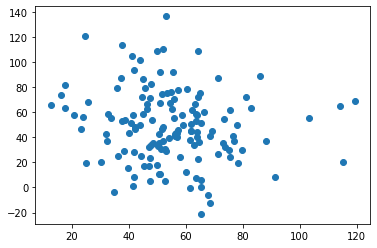

In [4]:
x = np.random.normal(54.3, 16.8, 142)
y = np.random.normal(47.8, 26.9, 142)

plt.scatter(x, y)

print(x.mean(), x.std(), y.mean(), y.std())

(array([ 6.,  8., 23., 40., 38., 14.,  7.,  2.,  1.,  3.]),
 array([ 12.42679142,  23.12044134,  33.81409127,  44.5077412 ,
         55.20139113,  65.89504105,  76.58869098,  87.28234091,
         97.97599083, 108.66964076, 119.36329069]),
 <BarContainer object of 10 artists>)

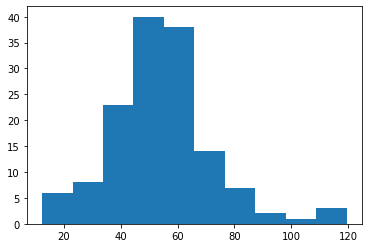

In [5]:
plt.hist(x)

(array([ 3., 10., 17., 28., 33., 25., 15.,  5.,  4.,  2.]),
 array([-21.13028037,  -5.3533464 ,  10.42358757,  26.20052155,
         41.97745552,  57.75438949,  73.53132346,  89.30825744,
        105.08519141, 120.86212538, 136.63905935]),
 <BarContainer object of 10 artists>)

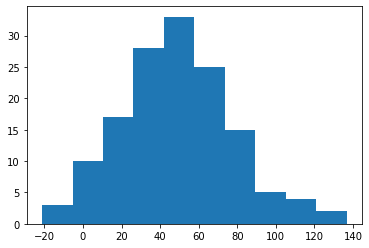

In [6]:
plt.hist(y)

{'whiskers': [<matplotlib.lines.Line2D at 0x1204c6790>,
 'caps': [<matplotlib.lines.Line2D at 0x1204c6d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1204c64c0>,
 'medians': [<matplotlib.lines.Line2D at 0x1204d7310>,
 'fliers': [<matplotlib.lines.Line2D at 0x1204d75e0>,
 'means': []}

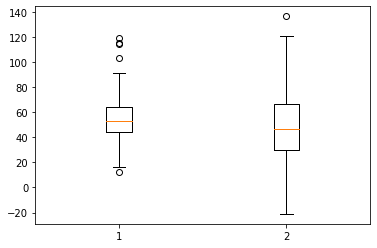

In [9]:
plt.boxplot([x,y])

In [13]:
def describe(data):
    return {
        'count': data.shape[0],
        'mean': data.mean(),
        'std': data.std()
    }

In [14]:
describe(x)

{'count': 142, 'mean': 54.66599843056714, 'std': 18.312645701783886}